<a href="https://colab.research.google.com/github/vkantimahanti/DataScienceLearnings/blob/main/Statistics_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import statistics

In [4]:
df = sns.load_dataset('tips')

In [5]:
df.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [9]:
np.mean(df['total_bill'])

19.78594262295082

In [10]:
np.median(df['total_bill'])

17.795

In [11]:
statistics.mode(df['total_bill'])

13.42

<Axes: >

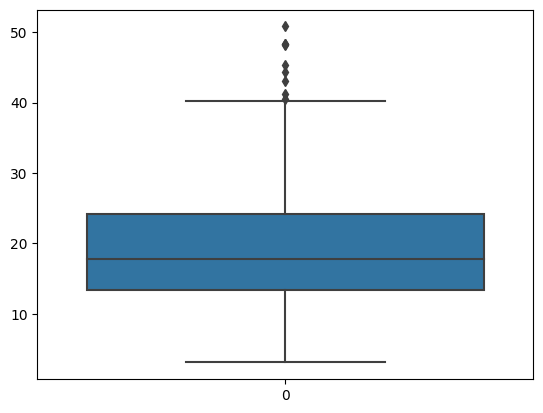

In [14]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

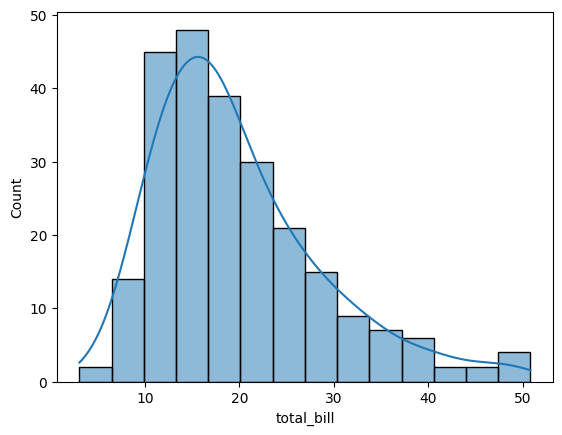

In [16]:
sns.histplot(df['total_bill'],kde = True)

In [19]:
df1 = sns.load_dataset('iris')

In [20]:
df1.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

<Axes: xlabel='sepal_width', ylabel='Count'>

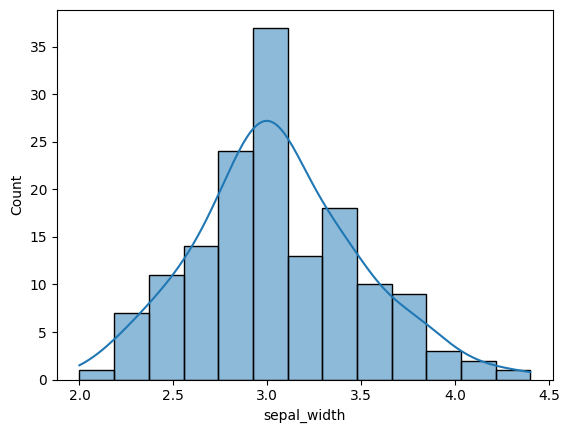

In [22]:
sns.histplot(df1['sepal_width'], kde = True)

<Axes: ylabel='count'>

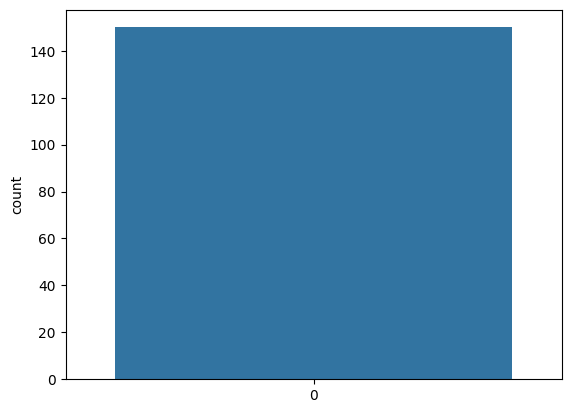

In [29]:
sns.countplot(df1['sepal_width'])

In [30]:
np.percentile(df1['sepal_width'],[25,75])

array([2.8, 3.3])

In [ ]:
### Outliers

In [76]:
data = [12,14,13,17,19,23,27,100,28,31,14,12,13,14,15,16,17,18,19,20,21,22,23,24,13,14,12,15,26,112]

(array([20.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102., 112.]),
 <BarContainer object of 10 artists>)

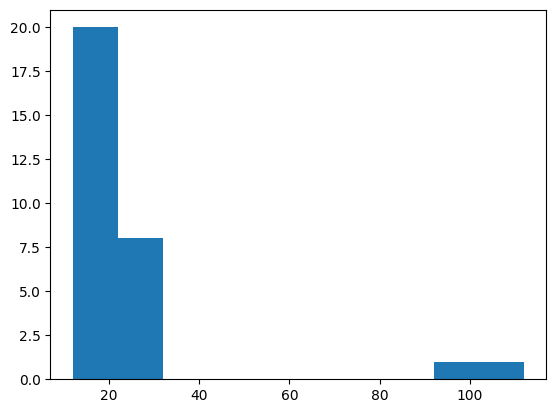

In [77]:
plt.hist(data)


In [78]:
outliers = []

def detect_outliers(data):
  threshold = 3 ## to understand third standard deviations
  mean = np.mean(data)
  sd = np.std(data)

  for i in data:
    z_score = (i-mean)/sd
    if np.abs(z_score) > threshold:
      outliers.append(i)

  return outliers

In [79]:
detect_outliers(data)

[100, 112]

In [ ]:
#IQR - Inter Quartile Range
# 1. Sort the data
# 2. Calculate Q1 and Q3
# 3. IQR(Q3-Q1)
# 4. Find the upper fence (q1+1.5IQR) and lower fence (q1-1.5IQR)

In [80]:
# 1. Sort the data
dataset = sorted(data)
dataset

[12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 15,
 15,
 16,
 17,
 17,
 18,
 19,
 19,
 20,
 21,
 22,
 23,
 23,
 24,
 26,
 27,
 28,
 31,
 100,
 112]

In [81]:
# 2. Calculate Q1 and Q3
q1, q3 = np.percentile(dataset, [25,75])
q1, q3

(14.0, 23.0)

In [82]:
# 3. IQR(Q3-Q1)
iqr = q3 - q1

In [83]:
# 4. Find the upper fence (q1+1.5IQR) and lower fence (q1-1.5IQR)
lf = q1 - (1.5*iqr)
uf = q3 + (1.5*iqr)
print(lf, uf)

0.5 36.5


<Axes: >

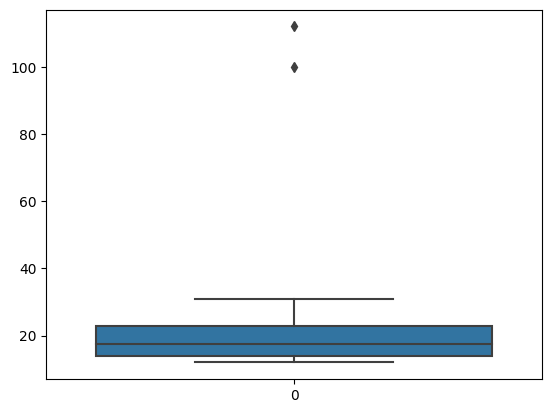

In [85]:
sns.boxplot(dataset)

In [ ]:
#### Z Test
# Suppose the IQ in a certain population is normally distributed with mean of 100 and standard deviation of 15.
# A researcher wants to perform if a new drugg affects IQ levels, so he recruits 20 patients to try it and record the IQ levels.
# The following code shows how to perform z-test

In [3]:
from statsmodels.stats.weightstats import ztest as ztest

In [4]:
#IQ level of 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

In [7]:
ztest(data, value = 110)
# here data is comapred with mean 100
# you will get ztest value and pvalue
# lets assume the significant value = 0.05 then we are going to reject the hypothesis with value as 100 and if you keep 110 then you will accept the value

(-3.3422547591628318, 0.0008310075180490068)

In [ ]:
## t-test

In [27]:
import pandas as pd
import scipy.stats as stats
import math

In [21]:
np.random.seed(6)
school_ages = stats.poisson.rvs(loc=18, mu = 35, size = 1500)
classA_ages = stats.poisson.rvs(loc=18, mu = 30, size = 60)

In [19]:
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [22]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [23]:
school_ages.mean()

53.303333333333335

In [29]:
from scipy.stats import ttest_1samp

In [33]:
_,p_value = ttest_1samp(classA_ages, popmean=school_ages.mean())

In [35]:
if p_value<=0.05:
  print("Reject H0   ")
else:
  print("Accept H0")

Reject H0   


In [ ]:
#covariance

In [ ]:
import seaborn as sns

In [37]:
df = sns.load_dataset('iris')

In [40]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


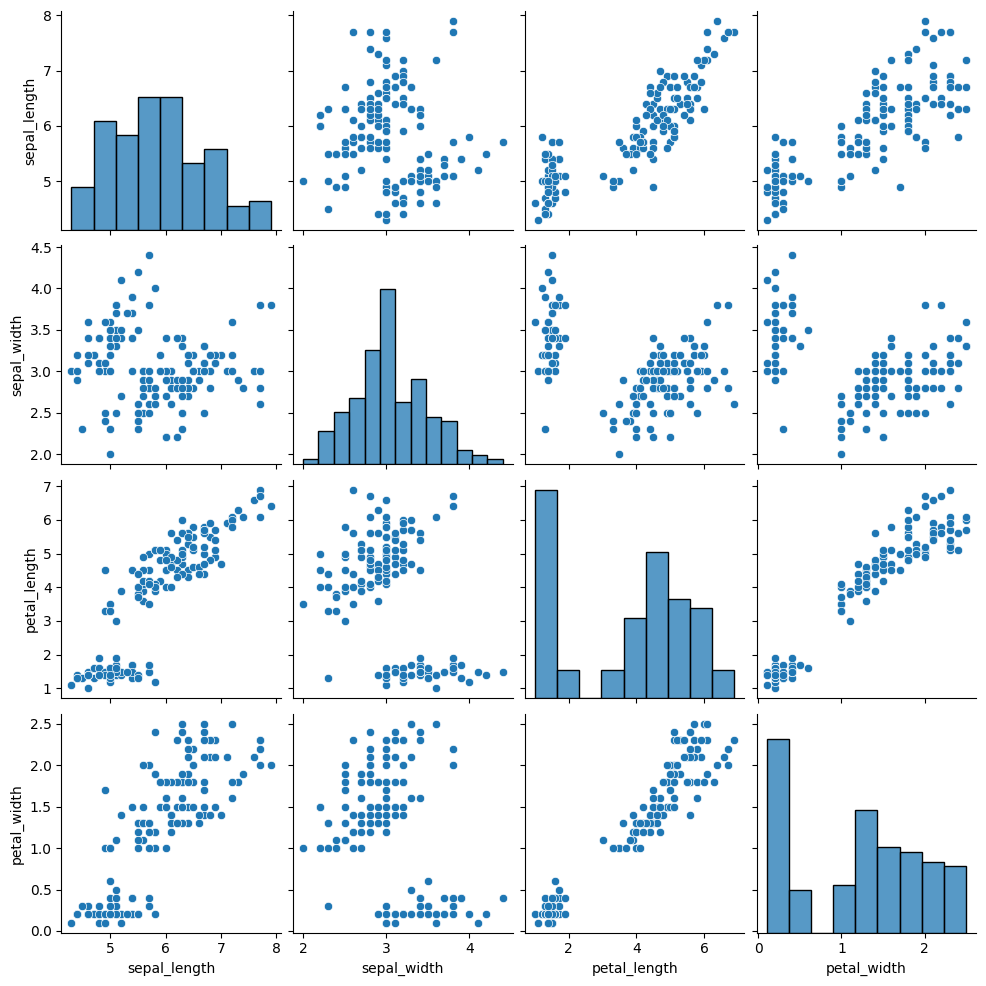

In [42]:
sns.pairplot(df)